# 3. First-Order Differential Equations

```{note}
In this chapter, methods will be given for solving first-order differential equations. Remember that first-order means that the first derivative of the unknown function is the highest derivative appearing in the equation.
```

### 3.1 Separable First-Order Differential Equations

```{index} Ordinary Differential Equations
```

A first order differential equation is called **separable** if it can be written as $\frac{dx}{dt} = f(x) \cdot g(t)$, that is, the independent variable and the dependent variable of the differential equation can be *separated* from one another.

```{admonition} Example
 - $y' = x^3$ is a separable differential equation.
 - $\frac{dx}{dt} = kx^2\sin(t)$ is a separable differential equation.
 - $y'(x) = x^2 -3y$ is not a separable differential equation. 
 - $\frac{dx}{dt}\cdot t -3xt^2 = 7t^2$ is a separable differential equation. In particular, this can be rewritten as $\frac{dx}{dt} = (7+3x)t$.
 ```

Given a separable differential equation $\frac{dx}{dt} = f(x) \cdot g(t)$, we can solve it with the following procedure.

1. Separate the variables: $\frac{1}{f(x)}dx = g(t)dt$
    
    *Note: $\frac{dx}{dt}$ is not a fraction, but this process can be done because we are implicitly applying the chain rule for multivariate functions.*
2. Integrate both sides with respect to the appropriate variable: $\displaystyle{\int \frac{1}{f(x)}dx = \int g(t)dt}$.
3. Write the solution in the form $F(x) = G(t)+C$, where $F'(x) = \frac{1}{f(x)}$ and $G'(t)=g(t)$.
4. If possible, solve the equation explicity for the dependent variable, in this case $x$.

```{admonition} Example

Find the explicit general solution to the differential equation $\frac{dx}{dt} = xt^2$.

Separate: $\frac{1}{x} dx = t^2 dt$

Integrate: $\displaystyle{\int \frac{1}{x} dx = \int t^2 dt}$

$\ln|x| = \frac{1}{3}t^3 + C$ $\rightarrow$ *Note: This is the implicit solution to the differential equation.*

Solve for the Dependent Variable: 

$$\ln|x| = \frac{1}{3}t^3 + C$$

$$e^{\ln|x|} = e^{\frac{1}{3}t^3 + C}$$

$$|x| = e^{\frac{1}{3}t^3}e^{C}$$

$$x = \pm e^{C} e^{\frac{1}{3}t^3}$$

$$x = De^{\frac{1}{3}t^3}, \text{ where } D = \pm e^{C}$$

```

In [158]:
from sympy import Function, dsolve, Eq, Derivative, symbols
from sympy.abc import t

# Define the unknown function x(t)
x = Function('x')

# Define the differential equation x'(t) = x(t)*t^2
diff_eq = Eq(Derivative(x(t),t), x(t)*t**2)

# Solve the differential equation
solution = dsolve(diff_eq)

print(solution)

Eq(x(t), C1*exp(t**3/3))


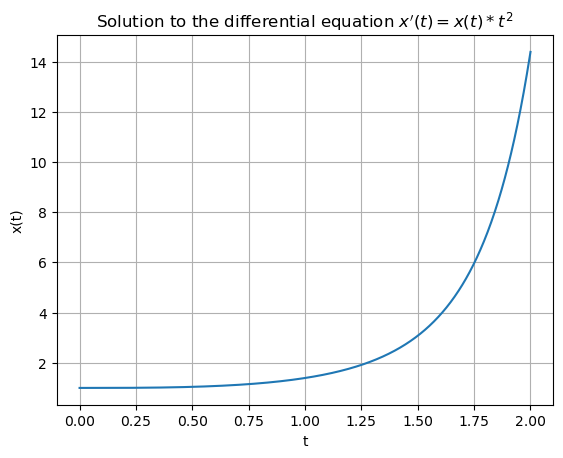

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the function for the differential equation
def dx_dt(x, t):
    return x*t**2

# Define the time range over which to solve the differential equation
t = np.linspace(0, 2, 1000)

# Define the initial condition x(0)=1
x0 = 1

# Solve the differential equation
x = odeint(dx_dt, x0, t)

# Plot the solution
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("Solution to the differential equation $ x'(t) = x(t)*t^2 $")
plt.grid(True)
plt.show()

```{admonition} Example

Find the explicit solution to the initial value problem $\frac{dW}{ds} = \frac{2s \cos^2(W)}{s^2-1}$ where $W(0)=0$.

Separate: $\frac{1}{\cos^2(W)} dW = \frac{2s}{s^2-1} ds$

Integrate: $\displaystyle{\int \sec^2(W) dW = \int \frac{2s}{s^2-1} ds}$

$\tan(W) = \ln|s^2-1| + C$ $\rightarrow$ *Note: This is the implicit solution to the differential equation.*

Solve for the Dependent Variable: 

$$W = \arctan(\ln|s^2-1|+C)$$

Use Initial Condition $W(0)=0$:

$$0 = \arctan(\ln|-1|+C)$$

$$0 = \arctan(C)$$

$$0 = C$$

Explicit Solution: $W = \arctan(\ln|s^2-1|)$
```

```{index} linear first order ODE
```

### 3.2 Linear First-Order Differential Equations

A first order differential equation is called **linear** if it can be written as $a_1(t)\frac{dx}{dt} + a_0(t)x= g(t)$. The equation is linear in the dependent variable, in this case $x$, and its derivative; the coefficient functions $a_1(t)$, $a_0(t)$, and $g(t)$ can be any function involving $t$.

```{admontion} Example
 - $y' + ye^x = \tan(t)$ is a linear differential equation.
 - $x\frac{dx}{dt} = kx^2\sin(t)$ is not a linear differential equation because of the $x \frac{dx}{dt}$ term.
 - $x'(t) = x^2 -3t$ is not a linear differential equation because of the $x^2$ term. 
 - $\frac{dx}{dt}\cdot t -3xt^2 = 7t^2$ is a linear differential equation. In particular, this can be rewritten as $t\frac{dx}{dt} -3t^2x = 7t^2$.
 ```

A first-order linear differential equation is said to be in **standard form** if it is written in the form $\frac{dx}{dt} + p(t)x = q(t)$. In other words, if the coefficient on the first derivative is $1$. Note that any first-order linear differential equation can be written in standard form by performing simple algebra. 

If $q(t)=0$, we say that the differential equation is **homogeneous**. If $q(t) \neq 0$, we say that the differential equation is **nonhomogeneous**. Note that if a first order differential equation is both linear and homogeneous, then it is also separable. You will be asked to show *why* in the exercises.

We will now develop a strategy for solving first-order linear differential equations. The basic idea is that we will multiply by a positive function that simplifies the left hand side of the differential equation. We must choose a positive function in order to preserve the solutions to the differential equation. 

Given a first-order linear differential equation *in standard form* $x' + p(t)x = q(t)$, the **integrating factor** for the differential equation is the function $\mu(t) = e^{P(t)}$ where $P(t)$ is *any* antiderivative of $p(t)$, that is, $P'(t)=p(t)$. The integrating factor is the positive function that we will multiply our differential equation by. So what is the significance of multiplying by the integrating factor?

Consider $x' + p(t)x = q(t)$.

1. Multiply by $\mu(t) = e^{P(t)}$, which yields $\mu(t)x' + \mu(t)p(t)x = \mu(t)q(t)$

2. Observe $\mu'(t) = e^{P(t)}P'(t) = e^{P(t)}p(t) = \mu(t)p(t)$.

3. Rewrite $\mu(t)x' + \mu(t)p(t)x = \mu(t)q(t)$ as $\mu(t)x' + \mu'(t)x = \mu(t)q(t)$.

4. Observe $\frac{d}{dt}\left( \mu(t)x(t) \right) = \mu(t)x'(t) + \mu'(t)x(t)$.

5. Rewrite $\mu(t)x' + \mu'(t)x = \mu(t)q(t)$ as $\frac{d}{dt}\left( \mu(t)x(t) \right) = \mu(t)q(t)$.

6. Integrate $\displaystyle{\int \frac{d}{dt}\left( \mu(t)x(t) \right) dt = \int \mu(t)q(t) dt}$.

$\displaystyle{\mu(t)x(t) = \int \mu(t)q(t) dt}$

7. Solve for the dependent variable

$x(t) = \displaystyle{\frac{1}{\mu(t)} \int \mu(t)q(t) dt}$.

Note we have no guarantee that we can integrate $\int \mu(t)q(t) dt$, but if we can we are able to solve first-order linear differential equations.

```{admonition} Example

Find the general solution to the differential equation $\frac{dx}{dt} + 3x = te^{-3t}$.

*Note:* This differential equation is in standard form so we can proceed by finding the integrating factor.

1. Multiply by $\mu(t) = e^{\int 3 dt} = e^{3t}$.

$$e^{3t}x'(t)+3e^{3t}x(t) = t$$

2. Observe $\frac{d}{dt}(e^{3t}\cdot x(t)) = e^{3t}x'(t)+3e^{3t}x(t)$.

3. Rewrite $e^{3t}x'(t)+3e^{3t}x(t) = t$ as $\frac{d}{dt}(e^{3t}\cdot x(t)) = t$.

4. Integrate $\displaystyle{\int \frac{d}{dt}(e^{3t}\cdot x(t)) dt = \int t dt}$.

$$e^{3t}x(t) = \frac{1}{2}t^2+C$$

5. Solve for the dependent variable.

$$x(t) = e^{-3t}(\frac{1}{2}t^2+C)$$
```

In [160]:
import sympy as sp

# Define the variables
t = sp.symbols('t')
x = sp.Function('x')

# Define the differential equation x'(t) = -3*x(t) + t*exp(-3t)
diff_eq = sp.Eq(x(t).diff(t), -3*x(t) + t*sp.exp(-3*t))

# Solve the differential equation
solution = sp.dsolve(diff_eq)

print(solution)

Eq(x(t), (C1 + t**2/2)*exp(-3*t))


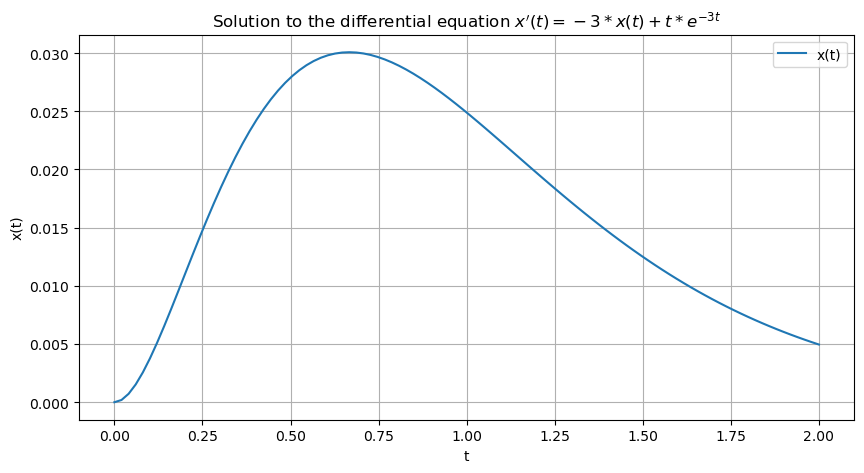

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols
t = sp.symbols('t')
x = sp.Function('x')

# Define the differential equation
diff_eq = sp.Eq(x(t).diff(t), -3*x(t) + t*sp.exp(-3*t))

# Solve the differential equation
solution = sp.dsolve(diff_eq)

# Create a lambdified function that can be used in numpy from the solution
# Assuming C1 = 0
f = sp.lambdify(t, solution.rhs.subs('C1', 0), 'numpy')

# Generate t values
t_values = np.linspace(0, 2, 100)

# Generate y values
y_values = f(t_values)

# Plot the solution
plt.figure(figsize=(10,5))
plt.plot(t_values, y_values, label='x(t)')
plt.title('Solution to the differential equation $ x\'(t) = -3*x(t) + t*e^{-3t} $')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

```{index} Slope Fields
```

### 3.3 Slope Fields

Note we still do not know how to solve every first-order linear differential equation. For example, $y' = x(x^2-y^2)$ is neither separable or linear. However, even if we cannot solve a differential equation, it is still possible to get qualitative information about the solution.

Consider the first-order differential equation $\frac{dx}{dt} = f(t,x)$. If we evaluate $f(t,x)$ at a set of grid points, we can then draw short vectors that represent the slope of the solution $x(t)$ at those points. If we look at this grid of vectors at many points, we can get an idea of what the solution, $x(t)$, looks like. This grid of vectors is called a **slope field** or **direction field**.

To draw a direction field, you can simply evaluate the differential equation at various points and plot the resulting vectors. For example, using the equation $y' = x(x^2-y^2)$, if you plug in the point (0,0), you see that the slope ($y'$) is $0$ at that point, so you can draw a short vector of $0$ slope at the origin. In fact, whenever $x = 0$, the slope is $0$, so along the y-axis, there will be short horizontal ($0$ slope) vectors at every y-value. This process can be repeated for a set of sample points to create a graph that tells us about the behavior of solutions to a first order equation.

Direction fields can also be plotted using electronically, as demonstrated below.

```{admonition} Example

Plot a direction field for $y'(x) = x + \sin(y)$.
```

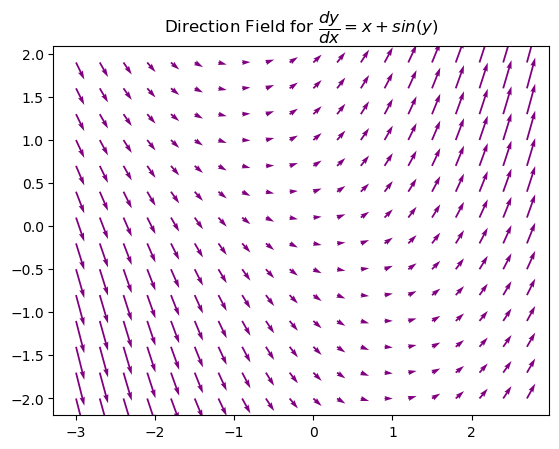

In [3]:
import numpy as np
import matplotlib.pyplot as plt

nx, ny = .3, .3
x = np.arange(-3,3,nx)
y = np.arange(-2,2,ny)

#Create a rectangular grid with points
X,Y = np.meshgrid(x,y)

#Define the functions
dy = X + np.sin(Y)
dx = np.ones(dy.shape)

#Plot
plt.quiver(X,Y,dx,dy,color='purple')
plt.title('Direction Field for $\dfrac{dy}{dx} = x + sin(y) $')
plt.show()

```{admontion} Example

Plot a direction field for $y'(x) = x^2 - y^2$.
```

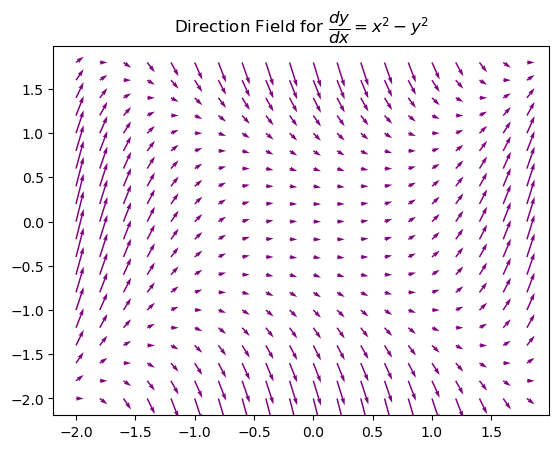

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Take some time to play around with the various parameters and see how it impacts the slope-field that is produced.
nx, ny = .2, .2
x = np.arange(-2,2,nx)
y = np.arange(-2,2,ny)

#Create a rectangular grid with points
X,Y = np.meshgrid(x,y)

#Define the functions
dy = X**2 -Y**2
dx = np.ones(dy.shape)

#Plot
plt.quiver(X,Y,dx,dy,color='purple')
plt.title('Direction Field for $ \dfrac{dy}{dx} = x^2 -y^2 $')
plt.show()

```{admonition} Example
Plot a direction field for $y'(x) = x^2 - y^2$.
```

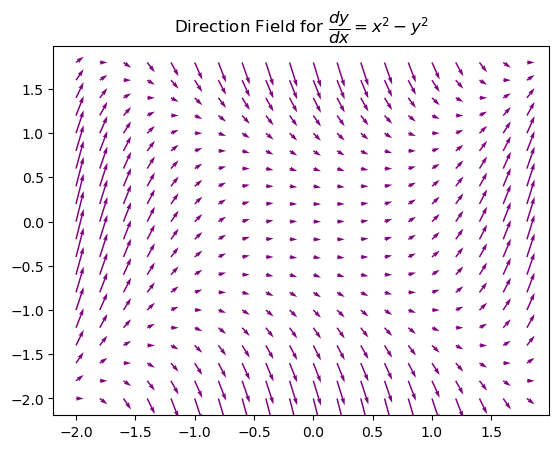

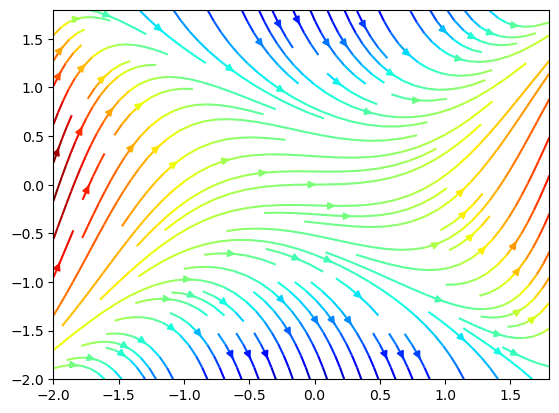

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Take some time to play around with the various parameters and see how it impacts the slope-field that is produced.
nx, ny = .2, .2
x = np.arange(-2,2,nx)
y = np.arange(-2,2,ny)

#Create a rectangular grid with points
X,Y = np.meshgrid(x,y)

#Define the functions
dy = X**2 -Y**2
dx = np.ones(dy.shape)

#Plot
plt.quiver(X,Y,dx,dy,color='purple')
plt.title('Direction Field for $ \dfrac{dy}{dx} = x^2 -y^2 $')
plt.show()

#You can also use the streamlines of the field to give a nice impression of the flow and color the curves.
plt.streamplot(X,Y,dx, dy, color=dy, density=1., cmap='jet', arrowsize=1)
plt.show()

You may use the following code to plot a direction field for $y'(x) = x^2-y^2$ and a particular solution curve given an initial condition.

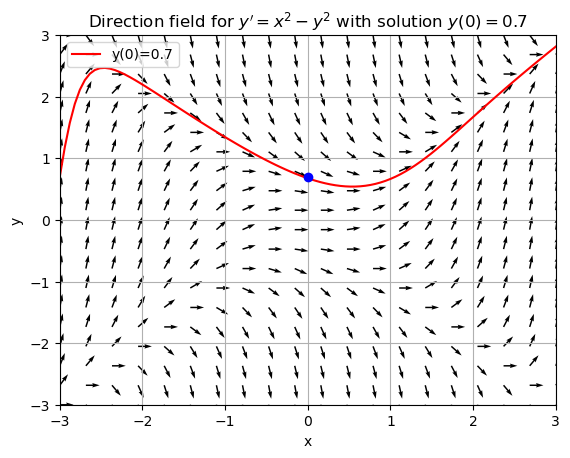

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the function for the differential equation
def dy_dx(y, x):
    return x**2 - y**2

# Generate a grid of points on which to evaluate the direction field
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)

X, Y = np.meshgrid(x, y)
U = 1
V = dy_dx(Y, X)
N = np.sqrt(U**2 + V**2)  # Normalize arrow length
U /= N
V /= N

# Plot the direction field
plt.quiver(X, Y, U, V, angles='xy')

# Solve the differential equation for the initial condition y(0)=1
x = np.linspace(-3, 3, 100)
y0 = .7  # initial condition
y = odeint(dy_dx, y0, x)

# Plot the solution on the direction field
plt.plot(x, y, 'r', label='y(0)=0.7')

# Plot the point (0,0.7)
plt.plot(0, .7, 'bo')  # 'bo' means blue dot

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.title("Direction field for $ y'=x^2-y^2 $ with solution $ y(0)=0.7 $")
plt.show()

```{admonition} Example

Plot a direction field for $y'(x) = x - y$ with multiple solution curves.
```

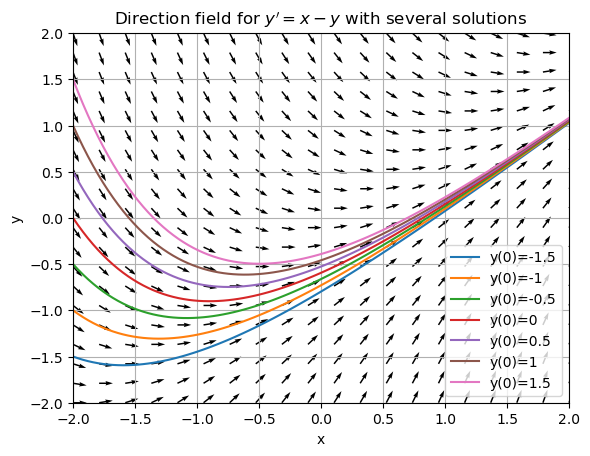

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the function for the differential equation
def dy_dx(y, x):
    return x - y

# Generate a grid of points on which to evaluate the direction field
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

X, Y = np.meshgrid(x, y)
U = 1
V = dy_dx(Y, X)
N = np.sqrt(U**2 + V**2)  # Normalize arrow length
U /= N
V /= N

# Plot the direction field
plt.quiver(X, Y, U, V, angles='xy')

# Solve the differential equation for various initial conditions and plot
x = np.linspace(-2, 2, 100)
initial_conditions = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]  # change as desired
for y0 in initial_conditions:
    y = odeint(dy_dx, y0, x)
    plt.plot(x, y, label=f'y(0)={y0}')

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.title("Direction field for $ y'=x-y $ with several solutions")
plt.show()

You may also use the following code to plot a direction field for $y'(x) = x-y$ and a single solution curve. Notice that there is a slider which allows you to adjust the initial condition and see different solution curves based on your choice of initial condition.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the function for the differential equation
def dy_dx(y, x):
    return x - y

# Define the x range and initial conditions
x = np.linspace(-2, 2, 100)

@interact
def plot_solution_curve(y0=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0)):

    # Generate a grid of points on which to evaluate the direction field
    x_grid = np.linspace(-2, 2, 20)
    y_grid = np.linspace(-2, 2, 20)

    X, Y = np.meshgrid(x_grid, y_grid)
    U = 1
    V = dy_dx(Y, X)
    N = np.sqrt(U**2 + V**2)  # Normalize arrow length
    U /= N
    V /= N

    # Plot the direction field
    plt.quiver(X, Y, U, V, angles='xy')

    # Solve the differential equation for the given initial condition
    y = odeint(dy_dx, y0, x)

    # Plot the solution on the direction field
    plt.plot(x, y, 'r', label=f'y(0)={y0}')

    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.title("Direction field for y'=x-y with adjustable initial condition")
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='y0', max=2.0, min=-2.0), Output()), _dom_classes=('w…

```{index} autonomous equations
```

### 3.4 Autonomous Equations

A first-order differential equation of the form $\frac{dx}{dt} = f(x)$ is called **autonomous**, that is, a differential equation where only the dependent variable appears. We can always solve these because they are always separable. In particular, we can always rewrite the differential equation as $\displaystyle{\int \frac{1}{f(x)} dx = \int dt}$ assuming $f(x) \neq 0$. But it can sometimes be very difficult to do so. 

It turns out that autonomous differential equations are nice in that they have constant solutions. In particular, $x(t)=c$ is a solution if $x'(t) = \frac{dc}{dt} = 0 = f(x(t)) = f(c)$. These are the trivial solutions we would lose when dividing by zero when handling it as a separable differential equation.

An **equilibrium solution** of an autonomous differential equation is a constant solution to the differential equation. In other words, if $f(c)=0$, then $x(t)=c$ is an equilibrium solution of $x'(t)=f(x)$.

```{admonition} Example

Find the equilibrium solutions of $x'(t) = x^2 - 9$. 

$x'(t)=0$

$x^2-9=(x-3)(x+3)=0$

So $x(t) = -3$ and $x(t)=3$ are the equilibrium solutions.

*Note: $\displaystyle{\int \frac{1}{x^2-9} dx = \int dt}$ would not have recovered these solutions.
```

Given the equilibrium solutions of an autonomous differential equation, we can make a phase line to analyze the behavior of the solution.

```{admonition} Example

Draw a phase line and determine where the solutions of the differential equation $y'(x) = y(y-1)^2(y-2)$ are increasing and decreasing.

First we must find the equilibrium solutions, which means we must solve $y'(x)=0$. This means $y(y-1)^2(y-2)=0$. So $y(x)=0$, $y(x)=1$, and $y(x)=2$ are the equilibrium solutions. To draw a phase line, see the code below.
```

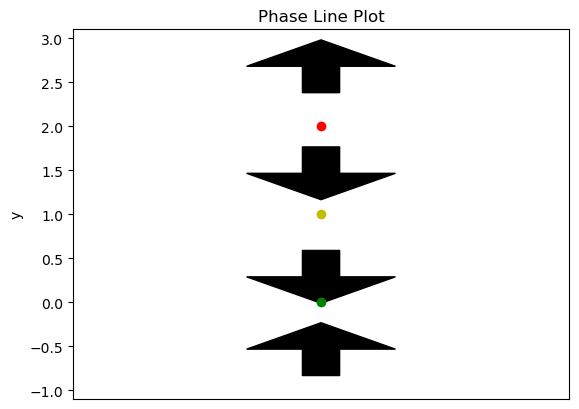

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function for the autonomous differential equation
def f(y):
    return y * (y - 1)**2 * (y - 2)

# Identify the critical points (where dy/dx = 0)
critical_points = [0, 1, 2]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the phase line at x = 0 with markers at the critical points
for point in critical_points:
    if f(point - 0.01) > 0 > f(point + 0.01):
        ax.plot(0, point, 'go')  # Stable points in green
    elif f(point - 0.01) < 0 < f(point + 0.01):
        ax.plot(0, point, 'ro')  # Unstable points in red
    else:
        ax.plot(0, point, 'yo') # Semi-stable point in yellow
        
# Draw arrows indicating direction of movement
arrow_properties = dict(facecolor='black', width=0.075, head_width=.3, head_length=.3)  # Decrease head_width to make arrows skinnier

check_points = [-0.5, 0.5, 1.5, 2.5]

# Check below the lowest critical point separately
if f(check_points[0]) > 0:
    ax.arrow(0, (check_points[0] - 1)/1.8, 0, 0.3, **arrow_properties)  # Pointing up if derivative is positive
else:
    ax.arrow(0, (check_points[0] - 1)/1.8, 0, -0.3, **arrow_properties)  # Pointing down if derivative is negative

for i in range(len(critical_points) - 1):
    if f(check_points[i+1]) > 0:
        ax.arrow(0, (critical_points[i] + critical_points[i+1])/1.7, 0, 0.3, **arrow_properties)  # Pointing up if derivative is positive
    else:
        ax.arrow(0, (critical_points[i] + critical_points[i+1])/1.7, 0, -0.3, **arrow_properties)  # Pointing down if derivative is negative

# Check above the highest critical point separately
if f(check_points[-1]) > 0:
    ax.arrow(0, (critical_points[-1] + 3)/2.1, 0, 0.3, **arrow_properties)  # Pointing up if derivative is positive
else:
    ax.arrow(0, (critical_points[-1] + 3)/2.1, 0, -0.3, **arrow_properties)  # Pointing down if derivative is negative

# Set the y-axis limits
plt.ylim(-1.1, 3.1)
# Set the x-axis limits
plt.xlim(-0.5, 0.5)

# Label the y-axis
plt.ylabel('y')

# Title of the plot
plt.title('Phase Line Plot')

# Remove the x-axis
plt.gca().axes.get_xaxis().set_visible(False)

# Show the plot
plt.show()

Notice that this tells us that a solution to the previous differential equation would have to be increasing on the interval $(-\infty,0)$ or decreasing on $(0,1)$ or decreasing on $(1,2)$ or increasing on $(2,\infty)$.

In addition it allows us to classify the stability of our equilibrium solutions. An equilibrium solution $x(t)=c$ is **stable** if solutions whose initial value is near $c$ stays near $c$ as the independent variable incrases.  An equilibrium solution $x(t)=c$ is **unstable** if solutions whose initial value is near $c$ goes away from $c$ as the independent variable incrases. An equilibrium solution is considered **semi-stable** if both cases occur (one in the region above and one in the region below). We can see an example of each type of equilibrium in the above example. In particular, $x(t)=0$ is stable, $x(t)=1$ is semi-stable, and $x(t)=2$ is unstable.
Alternatively, a stable solution can be referred to as a **sink**, an unstable solution as a **source**, and a semi-stable solution as a **node**.

It turns out that if we know that there is a unique solution to the autonomous initial-value problem $\frac{dx}{dt} = f(x)$ where $x(t_0)=x_0$, then we know a few more things about the solution. Namely,
1. The equilibrium points divide the region $\mathbb{R}^2$ plane into regions. A solution cannot pass between regions and the initial value will determine which region a particular solution is in.

2. The solution $x(t)$ is increasing/decreasing everywhere inside a particular region because $f(x)$ is either positive or negative everywhere in a region.

3. The limit of a solution $x(t)$ as $t \rightarrow \pm \infty$ is one of the boundaries of that region.

### Exercises

```{admonition} Exercises

1. Determine if the following first-order differential equations are linear, separable, both, or neither.
    - $\frac{dy}{dx} = y + x$
    - $\sqrt{y} + 2\frac{dy}{dx} = e^{x}$
    - $\sqrt{y}\frac{dy}{dx} = e^{x}$
    - $\frac{dy}{dx} = x+5$
    
2. Find the explicit solution to the differential equation $y'(x) = y+5$.

3. Find the explicit solution to the differential equation $W'(s) = s+sW^2$.

4. Find the explicit solution to the initial value problem $y'(t) = ty$ where $y(0)=3$.

5. Find the explicit solution to the initial value problem $x'(t) = x\sin(t)$ where $x(0)=1$.

6. Show that if a first order differential equation is both linear and homogeneous, then it is also separable.

7. Find the solution to the differential equation $\frac{dP}{dt} = \frac{2P}{t} + t^2\sec^2(t)$.

8. Find the solution to the initial value problem $xy' + y = \sin(x)$, where $y(\pi)=0$.

9. Plot a direction field for $y'(x) = y+x$.

10. Plot a direction field for $y'(x) = xy$.

11. Find the equilibirum solutions of $y'(x) = \sin(y)$.

12. Draw a phase line and determine where a solution of the differential equation $\frac{dT}{dt} = (T+1)T(T-3)^2$ is increasing and decreasing. Then classify the stability of each equilibrium point.
```